# IMPORTS

In [31]:
! pip install category-encoders
! pip install catboost
! pip install "vegafusion[embed]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#@title
print("\n... IMPORTS STARTING ...\n")

print("\n\tVERSION INFORMATION")
# Machine Learning and Data Science Imports
import tensorflow as tf; print(f"\t\t– TENSORFLOW VERSION: {tf.__version__}");
import pandas as pd; pd.options.mode.chained_assignment = None;
import numpy as np; print(f"\t\t– NUMPY VERSION: {np.__version__}");
import sklearn; print(f"\t\t– SKLEARN VERSION: {sklearn.__version__}");

from scipy.stats import norm
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split, KFold
from category_encoders.leave_one_out import LeaveOneOutEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import set_config
set_config(display="diagram")

from google.colab import drive

# Built In Imports
from collections import Counter
from datetime import datetime
from zipfile import ZipFile
from glob import glob
import warnings
import requests
import hashlib
import imageio
import IPython
import urllib
import zipfile
import pickle
import random
import shutil
import string
import json
import math
import time
import gzip
import ast
import sys
import io
import os
import gc
import re
warnings.filterwarnings('ignore')
%matplotlib inline

# Visualization Imports
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import vegafusion as vf
vf.enable()
    
print("\n\n... IMPORTS COMPLETE ...\n")


... IMPORTS STARTING ...


	VERSION INFORMATION
		– TENSORFLOW VERSION: 2.9.2
		– NUMPY VERSION: 1.21.6
		– SKLEARN VERSION: 1.0.2


... IMPORTS COMPLETE ...



# BACKGROUND INFORMATION

<h2>Introduction</h2>
<p dir="auto">The information gathered is from the DAEWOO Steel Co. Ltd in Gwangyang, South Korea. It produces several types of coils, steel plates, and iron plates. The information on electricity consumption is held in a cloud-based system. The information on energy consumption of the industry is stored on the website of the Korea Electric Power Corporation (pccs.kepco.go.kr), and the perspectives on daily, monthly, and annual data are calculated and shown.</p>

<h2>Attribute Information</h2>
<p dir="auto">
    <ul dir="auto">
        <li>Data Variables Type Measurement</li>
        <li>Industry Energy Consumption Continuous kWh</li>
        <li>Lagging Current reactive power Continuous kVarh</li>
        <li>Leading Current reactive power Continuous kVarh</li>
        <li>tCO2(CO2) Continuous ppm</li>
        <li>Lagging Current power factor Continuous %</li>
        <li>Leading Current Power factor Continuous %</li>
        <li>Number of Seconds from midnight Continuous S</li>
        <li>Week status Categorical (Weekend (0) or a Weekday(1))</li>
        <li>Day of week Categorical Sunday, Monday â€¦. Saturday</li>
        <li>Load Type Categorical Light Load, Medium Load, Maximum Load </li>
    </ul>   
</p>

<h2>Papers</h2>
<p dir="auto">
    <ol dir="auto">
        <li>Sathishkumar V E, Changsun Shin, Youngyun Cho, â€œEfficient energy consumption prediction model for a data analytic-enabled industry building in a smart cityâ€, Building Research & Information, Vol. 49. no. 1, pp. 127-143, 2021.</li>
        <li>Sathishkumar V E, Myeongbae Lee, Jonghyun Lim, Yubin Kim, Changsun Shin, Jangwoo Park, Yongyun Cho, â€œAn Energy Consumption Prediction Model for Smart Factory using Data Mining Algorithmsâ€ KIPS Transactions on Software and Data Engineering, Vol. 9, no. 5, pp. 153-160, 2020.</li>
Transactions on Software and Data Engineering, Vol. 9, no. 5, pp. 153-160, 2020.
        <li>Sathishkumar V E, Jonghyun Lim, Myeongbae Lee, Yongyun Cho, Jangwoo Park, Changsun Shin, and Yongyun Cho, â€œIndustry Energy Consumption Prediction Using Data Mining Techniquesâ€, International Journal of Energy Information and Communications, Vol. 11, no. 1, pp. 7-14, 2020. </li>
    </ol> 
</p>


# BASIC DATA DEFINITIONS & INITIALIZATIONS

In [3]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
print("\n... DATA ACCESS SETUP STARTED ...\n")

DATA_DIR = "/content/gdrive/My Drive/Colab Notebooks/Steel/dataset"

print(f"\n... DATA DIRECTORY PATH IS:\n\t--> {DATA_DIR}")

print(f"\n... IMMEDIATE CONTENTS OF DATA DIRECTORY IS:")
for file in tf.io.gfile.glob(os.path.join(DATA_DIR, "*")): print(f"\t--> {file}")

print("\n\n... DATA ACCESS SETUP COMPLETED ...\n")


... DATA ACCESS SETUP STARTED ...


... DATA DIRECTORY PATH IS:
	--> /content/gdrive/My Drive/Colab Notebooks/Steel/dataset

... IMMEDIATE CONTENTS OF DATA DIRECTORY IS:
	--> /content/gdrive/My Drive/Colab Notebooks/Steel/dataset/Steel_industry_data.csv


... DATA ACCESS SETUP COMPLETED ...



In [5]:
print("\n\n... LOAD DATAFRAME FROM CSV FILE ...\n")
df = pd.read_csv(os.path.join(DATA_DIR, "Steel_industry_data.csv"))
display(df.head())



... LOAD DATAFRAME FROM CSV FILE ...



date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   
4                         64.72                         100.0  4500   

  WeekStatus Day_of_week   Load_Type  
0    Weekday      Monday  Light_Load  
1    Weekday      Monday  Light_Load  
2    Weekday      Monday  Light_Load  
3    Weekday      Monday  Light_Load  
4    Weekday      Monday  Light_Load

In [6]:
print("\n\n... Change date column's data type ...\n")

df['date'] = pd.to_datetime(df['date'])

print("\n\n... Shift target column to front ...\n")

target = df['Usage_kWh']
df.drop(columns='Usage_kWh', inplace=True)
df.insert(0, 'Usage_kWh', target)

df.info(verbose=True)



... Change date column's data type ...



... Shift target column to front ...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Usage_kWh                             35040 non-null  float64       
 1   date                                  35040 non-null  datetime64[ns]
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64       
 4   CO2(tCO2)                             35040 non-null  float64       
 5   Lagging_Current_Power_Factor          35040 non-null  float64       
 6   Leading_Current_Power_Factor          35040 non-null  float64       
 7   NSM                                   35040 non-null  int64         
 8   WeekStatus                            35040 non-null  object    

Great, now we have all the correct data types. We do not have any missing (null) data, so I don't need to fill the null values of drop the columns that contain predominantly null values. 

## Data split

Now I need to split my data for train, cross-validation and test sets with 60%, 20% and 20% of data respectively. 

In [7]:
X, y = df.iloc[:, 1:], df.iloc[:, 0]
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.40, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)

# EDA

## Distributions

In [8]:
X_train.describe()

Lagging_Current_Reactive.Power_kVarh  \
count                          21024.000000   
mean                              13.019114   
std                               16.286978   
min                                0.000000   
25%                                2.300000   
50%                                5.000000   
75%                               22.570000   
max                               93.200000   

       Leading_Current_Reactive_Power_kVarh     CO2(tCO2)  \
count                          21024.000000  21024.000000   
mean                               3.891767      0.011507   
std                                7.448941      0.016181   
min                                0.000000      0.000000   
25%                                0.000000      0.000000   
50%                                0.000000      0.000000   
75%                                2.120000      0.020000   
max                               27.760000      0.070000   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor  \
count                  21024.000000                  21024.000000   
mean                      80.512315                     84.318141   
std                       18.985042                     30.529213   
min                        0.000000                      0.000000   
25%                       62.920000                     99.700000   
50%                       88.030000                    100.000000   
75%                       99.020000                    100.000000   
max                      100.000000                    100.000000   

                NSM  
count  21024.000000  
mean   42811.772260  
std    24936.968666  
min        0.000000  
25%    20700.000000  
50%    43200.000000  
75%    64800.000000  
max    85500.000000

We see that numerical features all have different scales. Let's take a look into the distribution of the target variable.

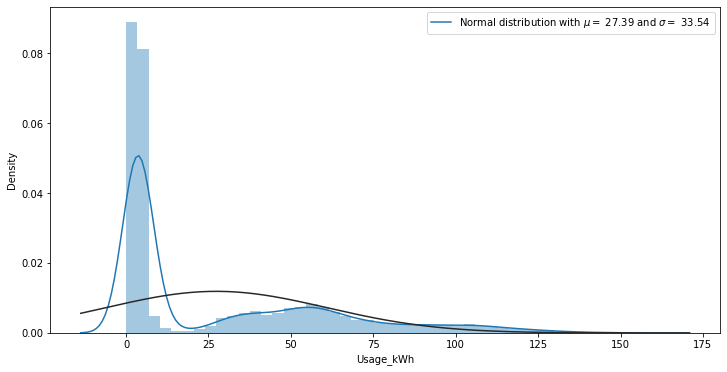

In [9]:
f, ax = plt.subplots(figsize=(12, 6))

(mean, std) = norm.fit(y_train)
sns.distplot(y_train, hist=True, kde=True, fit=norm)
plt.legend(['Normal distribution with $\mu=$ {:.2f} and $\sigma=$ {:.2f}'.format(mean, std)], loc='best')

#alternative plot in case above code doesn't work
# ax = sns.histplot(y_train, stat='density')
# x = np.linspace(mean-4*std, mean+4*std)
# p = norm.pdf(x, mean, std)
# z = plt.plot(x, p, color="black", linewidth=2)

In [10]:
print("\n\n... Creating dataframe for lineplot ...\n")

train_df = X_train.join(y_train)
train_df = train_df.sort_values(['date'])



... Creating dataframe for lineplot ...



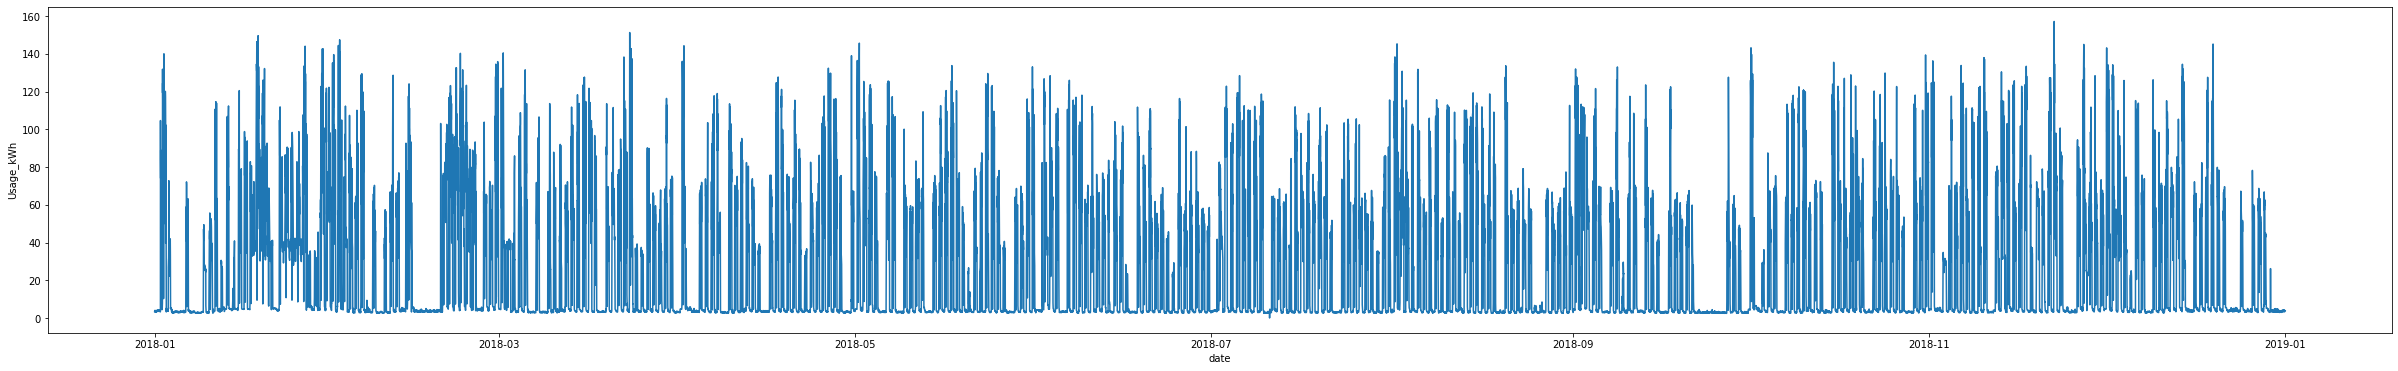

In [11]:
f, ax = plt.subplots(figsize=(42, 6))
sns.lineplot(data=train_df, x='date', y='Usage_kWh')

Target variable of the energy usage is skewed and not distributed normally. We also do not observe any substantial periods of missing data.

## Leave One Out Encoding

After exploring basic distributions, let's look at the categorical features. First, we need to encode them, and I'm using LeaveOneOutEncoder here. In the upcoming cells we'll look into categorical features using both encoded and labeled versions to see the relationships with other variables.

In [12]:
display(X_train['WeekStatus'].value_counts())
display(X_train['Day_of_week'].value_counts())
display(X_train['Load_Type'].value_counts())

Weekday    15012
Weekend     6012
Name: WeekStatus, dtype: int64

Friday       3040
Wednesday    3025
Saturday     3016
Monday       3012
Sunday       2996
Thursday     2983
Tuesday      2952
Name: Day_of_week, dtype: int64

Light_Load      10852
Medium_Load      5819
Maximum_Load     4353
Name: Load_Type, dtype: int64

In [13]:
feature_list = X_train.columns

LOOE_encoder = LeaveOneOutEncoder()

train_looe = LOOE_encoder.fit_transform(X_train[feature_list], y_train)
val_looe = LOOE_encoder.transform(X_val[feature_list])
test_looe = LOOE_encoder.transform(X_test[feature_list])

In [14]:
Xy_train = train_looe.join(y_train)
Xy_val = val_looe.join(y_val)
Xy_test = test_looe.join(y_test)
Xy_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21024 entries, 25717 to 15795
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  21024 non-null  datetime64[ns]
 1   Lagging_Current_Reactive.Power_kVarh  21024 non-null  float64       
 2   Leading_Current_Reactive_Power_kVarh  21024 non-null  float64       
 3   CO2(tCO2)                             21024 non-null  float64       
 4   Lagging_Current_Power_Factor          21024 non-null  float64       
 5   Leading_Current_Power_Factor          21024 non-null  float64       
 6   NSM                                   21024 non-null  int64         
 7   WeekStatus                            21024 non-null  float64       
 8   Day_of_week                           21024 non-null  float64       
 9   Load_Type                             21024 non-null  float64       

## Correlations

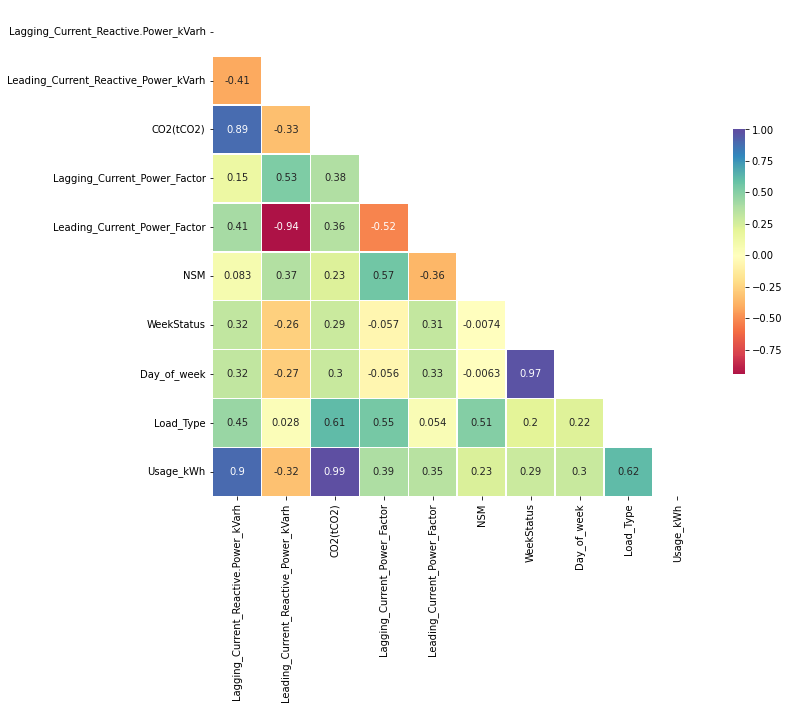

In [15]:
corr = Xy_train.corr('pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap='Spectral', vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The heatmap above shows linear correlations (Pearson) between all the variables. Turns out that CO2 and Lagging Current Reactive Power have the strongest positive relatioonships.</br> </br>Let's explore if there are any nonlinear relations using Mututal Information method below. The higher MI score, the stronger is the non-linear relationship between features and the target.



In [16]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(Xy_train.iloc[:, 1:], y_train, discrete_features=[2, 6, 7, 8])
mi_scores[::]  # show a few features with their MI scores

WeekStatus                              6.390349
Usage_kWh                               6.304997
Load_Type                               6.195003
Day_of_week                             5.732717
CO2(tCO2)                               1.294484
Lagging_Current_Power_Factor            1.102047
Lagging_Current_Reactive.Power_kVarh    0.868191
NSM                                     0.463212
Leading_Current_Power_Factor            0.405948
Leading_Current_Reactive_Power_kVarh    0.348086
Name: MI Scores, dtype: float64

## Boxplots for categorical data

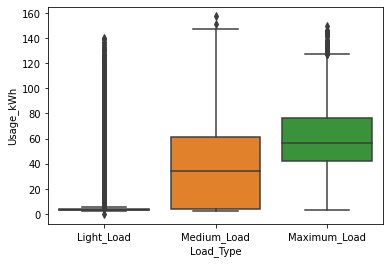

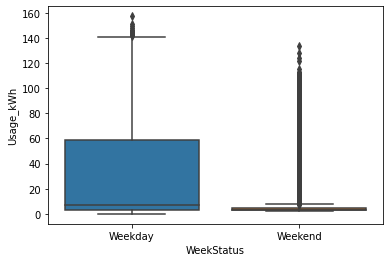

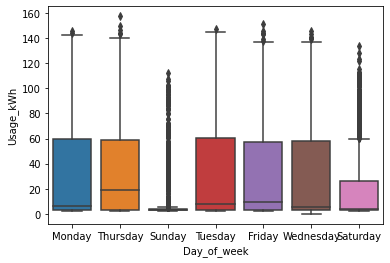

In [17]:
sns.boxplot(data=train_df, y='Usage_kWh', x='Load_Type')
plt.show()
sns.boxplot(data=train_df, y='Usage_kWh', x='WeekStatus')
plt.show()
sns.boxplot(data=train_df, y='Usage_kWh', x='Day_of_week')
plt.show()

We can see that the energy usage was very different depending on the load size and especially low at the light loads. Moreover, depending on the days of the week it also had different means and noticable variance for weekends.

## Scatterplots

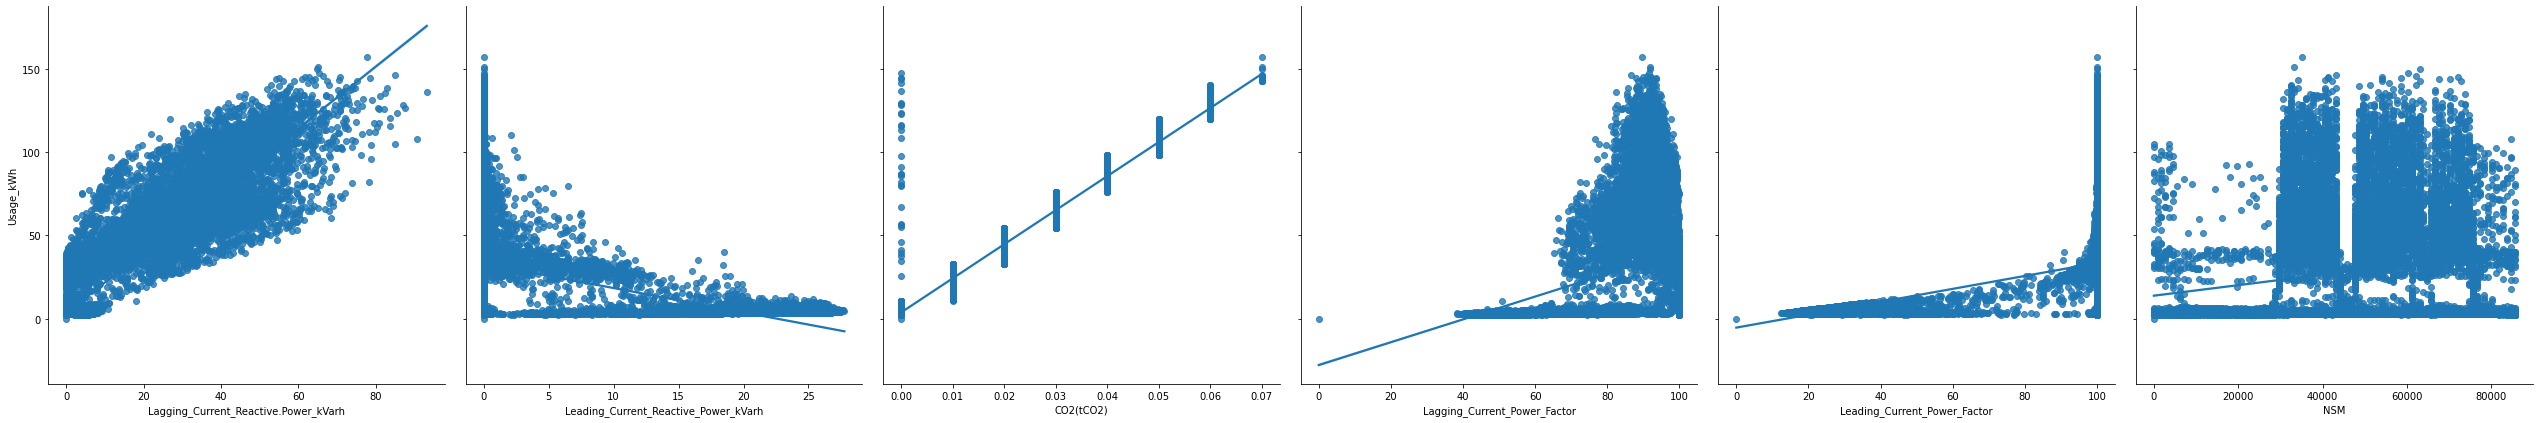

In [18]:
g = sns.PairGrid(Xy_train, y_vars=["Usage_kWh"], x_vars=X_train.columns.drop(['date', 'Load_Type', 'Day_of_week', 'WeekStatus']), height=6)
g.map(sns.regplot)

Lagging Current Reactive Power and CO2 features have a clear linear trend with the target energy usage. 

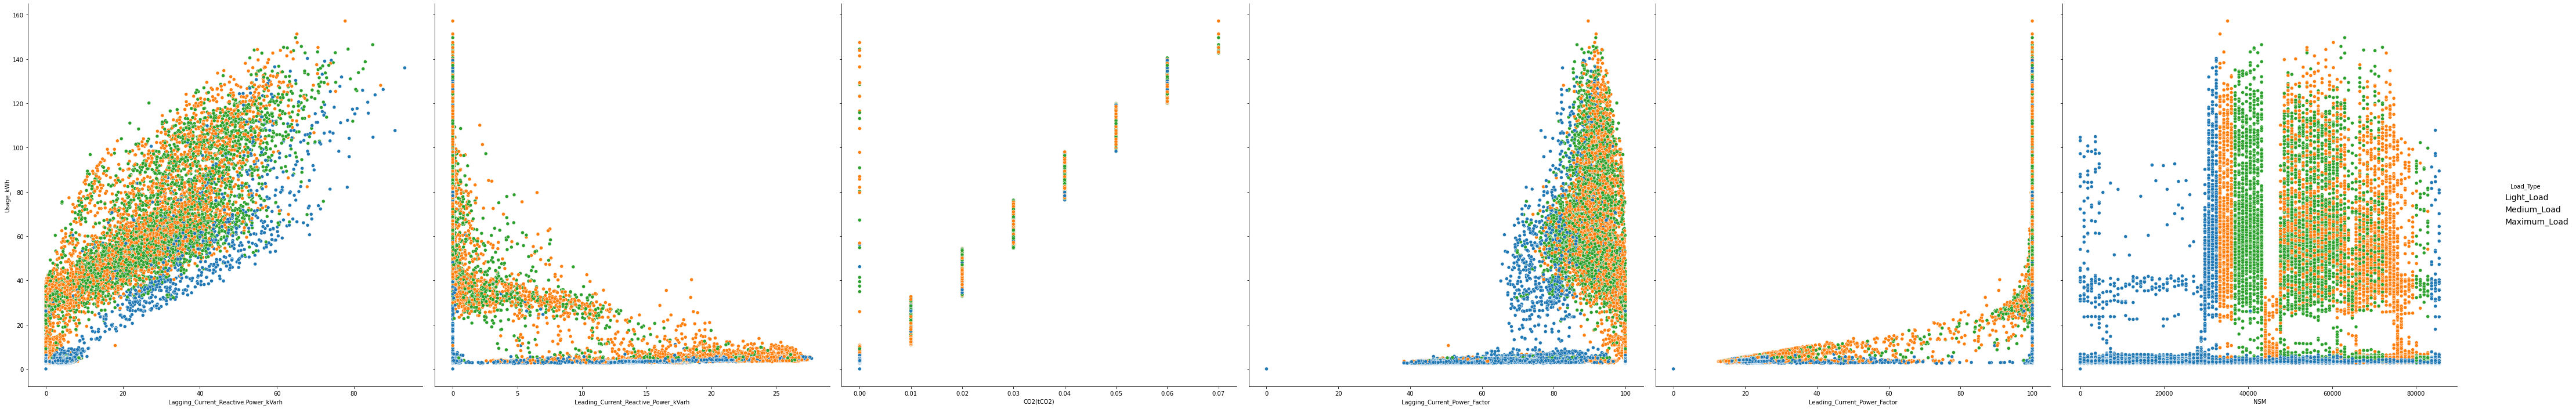

In [19]:
g = sns.PairGrid(data=train_df, y_vars=["Usage_kWh"], x_vars=X_train.columns.drop(['date', 'Load_Type', 'Day_of_week', 'WeekStatus']), height=10, hue='Load_Type')
g = g.add_legend(fontsize=14)
g.map(sns.scatterplot)

Interestingly, light loads (blue) have clear differentiations if we look at them in the context of the NSM and Leading Current Power Factor.

# BASIC ALGORITHMS CHECK PIPELINE

Before trying to predict energy usage by looking at the algorithms that use gradient descent, we need to encode categorical features and scale our data. I discovered that all these preprocessing steps as well as checking various algorithm's preformance can be done in a pipeline.

In [20]:
FEATURES = X_train.drop('date', axis=1).columns
NUMERICAL = X_train[FEATURES].select_dtypes('number').columns
print(f"Numerical features: {', '.join(NUMERICAL)}")

CATEGORICAL = pd.Index(np.setdiff1d(FEATURES, NUMERICAL))
print(f"Categorical features: {', '.join(CATEGORICAL)}")

Numerical features: Lagging_Current_Reactive.Power_kVarh, Leading_Current_Reactive_Power_kVarh, CO2(tCO2), Lagging_Current_Power_Factor, Leading_Current_Power_Factor, NSM
Categorical features: Day_of_week, Load_Type, WeekStatus


In [21]:
def calculate_metrics(model_pipe, X, y):
    """Calculate R2 score and RMSE. 
    
    Parameters:
    ===========
    model_pipe: sklearn model or pipeline
    X: features
    y: true target
    """
    y_proba = model_pipe.predict(X)
    return "{:.5f}".format(r2_score(y, y_proba)), "{:.5f}".format(mean_squared_error(y, y_proba, squared=False))

## Pipeline

In [22]:
regr = [DummyRegressor(strategy='mean'), 
        LinearRegression(), 
        AdaBoostRegressor(), 
        BaggingRegressor(), 
        SVR(),
        GradientBoostingRegressor(), 
        RandomForestRegressor(),
        XGBRegressor(),
        CatBoostRegressor(verbose=0),
        LGBMRegressor()]

numerical_pipe = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipe = Pipeline([
    ('encoder', LeaveOneOutEncoder()),
    ('scaler', StandardScaler())
])

preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, NUMERICAL),
    ('cat', categorical_pipe, CATEGORICAL)
])

results = {}

for i, regr_model in enumerate(regr):
    pipe = Pipeline([
        ('preprocessors', preprocessors),
        ('model', regr_model)
    ])

    pipe.fit(X_train, y_train)
    r2, rmse = calculate_metrics(pipe, X_val, y_val)
    print(f"\n CURRENT REGRESSOR IS:\n\t--> {regr_model}")
    print(f"\n... ... R2 FOR CROSS-VALIDATION IS:\n\t--> {r2}")
    print(f"\n... ... RMSE FOR CROSS-VALIDATION IS:\n\t--> {rmse}")
    results[i] = [float(r2), float(rmse)]


 CURRENT REGRESSOR IS:
	--> DummyRegressor()

... ... R2 FOR CROSS-VALIDATION IS:
	--> -0.00007

... ... RMSE FOR CROSS-VALIDATION IS:
	--> 33.51156

 CURRENT REGRESSOR IS:
	--> LinearRegression()

... ... R2 FOR CROSS-VALIDATION IS:
	--> 0.98477

... ... RMSE FOR CROSS-VALIDATION IS:
	--> 4.13506

 CURRENT REGRESSOR IS:
	--> AdaBoostRegressor()

... ... R2 FOR CROSS-VALIDATION IS:
	--> 0.97274

... ... RMSE FOR CROSS-VALIDATION IS:
	--> 5.53230

 CURRENT REGRESSOR IS:
	--> BaggingRegressor()

... ... R2 FOR CROSS-VALIDATION IS:
	--> 0.89317

... ... RMSE FOR CROSS-VALIDATION IS:
	--> 10.95280

 CURRENT REGRESSOR IS:
	--> SVR()

... ... R2 FOR CROSS-VALIDATION IS:
	--> 0.99283

... ... RMSE FOR CROSS-VALIDATION IS:
	--> 2.83781

 CURRENT REGRESSOR IS:
	--> GradientBoostingRegressor()

... ... R2 FOR CROSS-VALIDATION IS:
	--> 0.94071

... ... RMSE FOR CROSS-VALIDATION IS:
	--> 8.15991

 CURRENT REGRESSOR IS:
	--> RandomForestRegressor()

... ... R2 FOR CROSS-VALIDATION IS:
	--> 0.88382

The results for each of the used models are nicely printed out by the pipeline loop. Now let's try to find the model with the lowest root mean squared error (RMSE). We can also find it by both RMSE and R2 metrics, but I choose to use only RMSE.

In [23]:
min(results.items(), key=lambda x: x[1][1])

(4, [0.99283, 2.83781])

I see that my model number 4 (starting with 0) which is SVR or Support Vector Regression has the lowest RMSE among the 10 models checked.

In [24]:
pipe_line = Pipeline([
    ('preprocessors', preprocessors),
    ('model', SVR())
])

pipe_line.fit(X_train, y_train)
pipe_line

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   LeaveOneOutEncoder()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Day_of_week', 'Load_Type', 'WeekStatus'], dtype='object'))])),
                ('model', SVR())])

In [25]:
print("Cost function of the baseline model: R2 {:.5f}".format(results[0][0]), "RMSE {:.5f}".format(results[0][1]))

y_prob_train = pipe_line.predict(X_train)
r2_train, rmse_train = "{:.5f}".format(r2_score(y_train, y_prob_train)), "{:.5f}".format(mean_squared_error(y_train, y_prob_train, squared=False))
print(f"Cost function of the training set: R2 {r2_train} and RMSE {rmse_train}")

y_prob_val = pipe_line.predict(X_val)
r2_val, rmse_val = "{:.5f}".format(r2_score(y_val, y_prob_val)), "{:.5f}".format(mean_squared_error(y_val, y_prob_val, squared=False))
print(f"Cost function of the validation set: R2 {r2_val} and RMSE {rmse_val}")

Cost function of the baseline model: R2 -0.00007 RMSE 33.51156
Cost function of the training set: R2 0.99158 and RMSE 3.07839
Cost function of the validation set: R2 0.99283 and RMSE 2.83781


Our SVR model is performing so much better than the Dummy Regressor that just takes the mean of the data. Moreover, the difference between training error and the error on our validation set is only 0.24, which indicates the model does not have high variance and it is not overfitting!

## K-Fold

As a next step, I want to double-check my results by applying KFold cross-validation for the entire dataset to make sure that the results of the cross validation is preserved in any random combination of data.  

In [26]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for k, (train_index, test_index) in enumerate(k_fold.split(X, y)):
    X_trai, X_tes = X.loc[train_index], X.loc[test_index]
    y_trai, y_tes = y[train_index], y[test_index]
    pipe_line.fit(X_trai, y_trai)
    s1, s2 = calculate_metrics(pipe_line, X_tes, y_tes)
    scores.append([s1, s2])
    print(f"R2 for fold {k}: ", s1)
    print(f"RMSE for fold {k}: ", s2)

R2 for fold 0:  0.99394
RMSE for fold 0:  2.62562
R2 for fold 1:  0.99379
RMSE for fold 1:  2.59106
R2 for fold 2:  0.99347
RMSE for fold 2:  2.68015
R2 for fold 3:  0.99328
RMSE for fold 3:  2.76180
R2 for fold 4:  0.99203
RMSE for fold 4:  3.01170


So for the final step, I want to take a quick look at the predicted (red) and actual (blue) data.

alt.LayerChart(...)

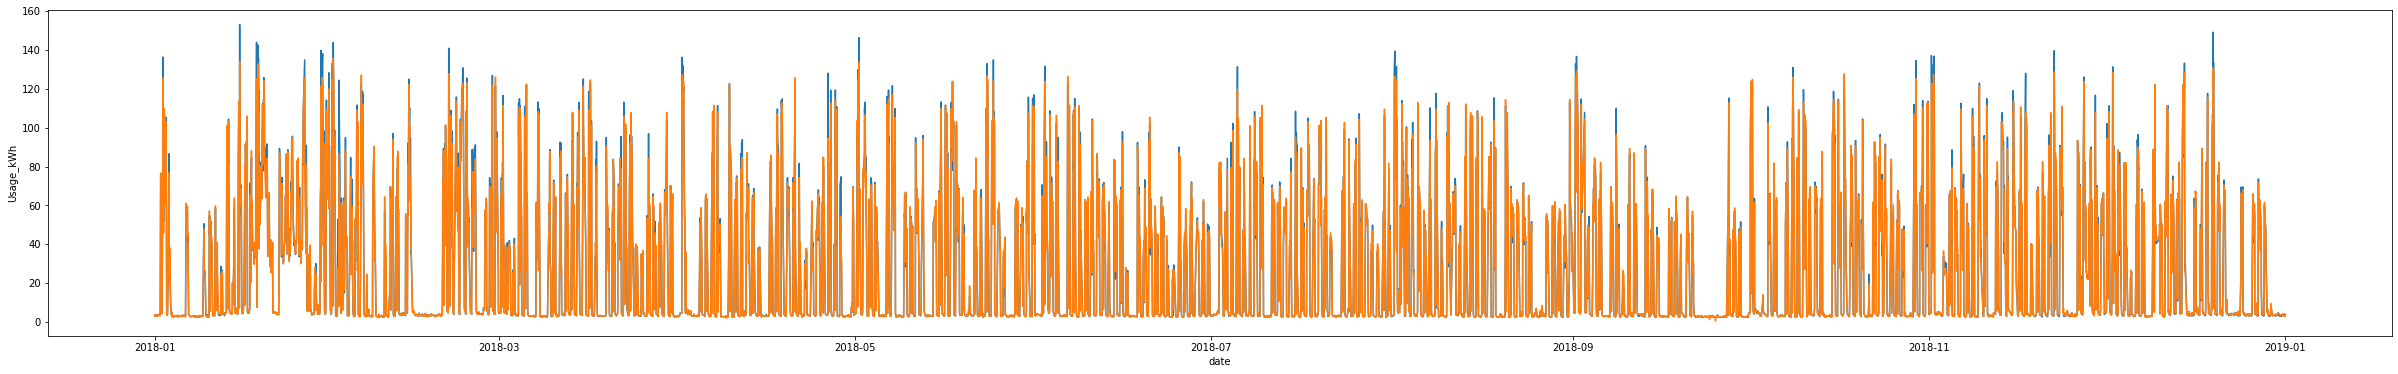

In [32]:
y_t = X_test.join(y_test)

y_prob_test = pipe_line.predict(X_test)
y_t['Usage_kWh_pred'] = y_prob_test

f, ax = plt.subplots(figsize=(42, 6))
sns.lineplot(data=y_t, x='date', y='Usage_kWh')
sns.lineplot(data=y_t, x='date', y='Usage_kWh_pred')

base = alt.Chart(y_t).transform_calculate(
    line1="'Original data'",
    line2="'Predicted data'"
).properties(
    width=800,
    height=300
)

scale = alt.Scale(domain=["Original data", "Predicted data"], range=['#8da5c7', '#e06666'])

line1 = base.mark_line(color='purple').encode(
  x=alt.X('date:T', title='Date'),
  y=alt.Y('Usage_kWh:Q', title='Actual usage', scale=alt.Scale(zero=False)),
  color=alt.Color('line1:N', scale=scale, title='')
).interactive()

line2 = base.mark_line(color='purple').encode(
  x=alt.X('date:T', title='Date'),
  y=alt.Y('Usage_kWh_pred:Q', title='Predicted usage', scale=alt.Scale(zero=False)),
  color=alt.Color('line2:N', scale=scale, title='')
).interactive()

line1 + line2

Altair package gives me a nice interactive way to examine the differences between actual and predicted values for the test set. I see that my basic SVR model gives a pretty good estimation for the energy usage at the steel plant.

</br> 

So this is the end of my quick ML pipeline and data analysis. I hope this will be helpful as a good starting point for your own work!